In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

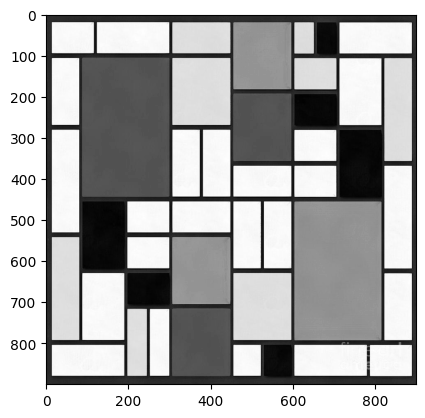

In [19]:
img = cv2.imread("../../data/Squares.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = "gray")


In [20]:
h,w = img.shape
img = np.pad(img, [(2, 2),(2,2)], mode='constant')
directions = np.array([[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 1], [1, -1], [1, 0], [1, 1]])
change = np.zeros((8))
thresh = 375000
x, vLine, hLine = [], [], []
s, c = 0, 0

for i in range(2,h+2):
    for j in range(2, w+2):
        kernel = img[i-1:i+2, j-1:j+2]
        for id, d in enumerate(directions):
            p = img[i-1+d[0]:i+2+d[0], j-1+d[1]:j+2+d[1]]
            change[id] = np.sum(np.square(np.subtract(kernel, p).astype(int)))
        up, left, right, down = change[[1, 3, 4, 6]]
        if up > thresh and down > thresh and left < thresh and right < thresh:
            hLine.append((i, j))
        if left > thresh and right > thresh and up < thresh and down < thresh:        
            vLine.append((i, j))
        if up > thresh and down > thresh and left > thresh and right > thresh:
            x.append((i, j))
x, vLine, hLine = np.array(x), np.array(vLine), np.array(hLine)

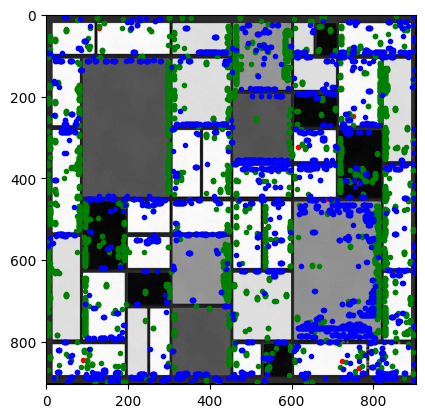

In [21]:
plt.imshow(img, cmap = "gray")
if x.shape[0]: plt.scatter(x[:, 1], x[:, 0], color = 'r', marker = '.')
if vLine.shape[0]: plt.scatter(vLine[:, 1], vLine[:, 0], color = 'g', marker = '.')
if hLine.shape[0]: plt.scatter(hLine[:, 1], hLine[:, 0], color = 'b', marker = '.')